<a href="https://colab.research.google.com/github/100rab-S/Fun-With-MNIST/blob/main/MNIST-1/Model%20for%20Digit%20Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Handwritten Digit Recognition model using Keras

In [ ]:
cd /content/drive/MyDrive/Handwritten digit recognition

/content/drive/MyDrive/Handwritten digit recognition


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
# import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from tensorflow.keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator

In [48]:
def format_input(features, labels, num_classes):
    # features = tf.convert_to_tensor(features)
    features = tf.expand_dims(features, axis = -1)
    labels = keras.utils.to_categorical(labels, num_classes)
    return features, labels

In [49]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10

print('Shape of the dataset before formatting')
print('\nTraining Data:', x_train.shape, y_train.shape, sep = ' ')
print('Test Data:', x_test.shape, y_test.shape, sep = ' ')

x_train, y_train = format_input(x_train, y_train, num_classes)
x_test, y_test = format_input(x_test, y_test, num_classes)

print('\nShape of the dataset after formatting')
print('\nTraining Data:', x_train.shape, y_train.shape, sep = ' ')
print('Test Data:', x_test.shape, y_test.shape, sep = ' ')

batch_size = 128

# Data augmentation for decreasing overfitting
train_datagen = ImageDataGenerator(rotation_range=0.5, height_shift_range=0.2, shear_range=0.2,
                                   zoom_range = 0.2, rescale = 1.0/255.0, dtype = 'float32')

valid_datagen = ImageDataGenerator(rescale=1./255., dtype = 'float32')
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size, shuffle = True)
valid_generator = valid_datagen.flow(x_test, y_test, batch_size = batch_size)


Shape of the dataset before formatting

Training Data: (60000, 28, 28) (60000,)
Test Data: (10000, 28, 28) (10000,)

Shape of the dataset after formatting

Training Data: (60000, 28, 28, 1) (60000, 10)
Test Data: (10000, 28, 28, 1) (10000, 10)


In [50]:
# class myModel(Model):
#     def __init__(self, num_classes):
#         super(myModel, self).__init__()
#         self.conv1 = Conv2D(64, kernel_size=(5, 5),activation='relu', padding = 'same')
#         self.conv2 = Conv2D(128, kernel_size=(3, 3), activation = 'relu', padding = 'same')
#         self.conv3 = Conv2D(512, (3, 3), activation='relu', padding = 'same')
#         self.maxpool = MaxPooling2D(pool_size=(2, 2))

#         self.flatten = Flatten()
#         self.dense1 = Dense(128, activation = 'relu', kernel_regularizer=keras.regularizers.L2())
#         self.dense2 = Dense(64, activation = 'relu')
#         self.dense3 = Dense(num_classes, activation = 'softmax')
#         self.dropout = Dropout(0.2)

#     def call(self, inputs):
#         x = self.conv1(inputs)
#         x = self.maxpool(x)
#         x = self.conv2(x)
#         x = self.maxpool(x)
#         x = self.conv3(x)
#         x = self.maxpool(x)
#         x = self.flatten(x)
#         x = self.dense1(x)
#         x = self.dense2(x)
#         x = self.dropout(x)
#         output = self.dense3(x)

#         return output

#     def build_graph(self):
#         '''
#         A workaround to display the summary and plot of the model. Since .summary() and plot_model() does not work with
#         models which are created by sub-classing the Model class, with the help of this function we can display both summary and
#         plot_model for simple sub-classed models (Need to check for nested models and exotic models).

#         parameters: None (Optional to send the dimension of the input or simply hard code the dimension if you know before hand)

#         working: This function creates the sub-classed model into a functional model by creating an Input layer and instantiating the
#         model by passing both input and output layer to the model.

#         Returns: The model object (although we donot use this other than plotting the model)
#         '''
#         x = Input(shape=(28, 28, 1))
#         return Model(inputs=[x], outputs=self.call(x))


# model = myModel(num_classes)

# use the below code to display summary of the model
# model.build_graph().summary()

# use the below code to plot architecture of the model
# plot_model(model.build_graph(), show_shapes = True)

In [67]:
def Models(inputs):
    x = Conv2D(64, kernel_size=(5, 5),activation='relu', padding = 'same')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, kernel_size=(3, 3), activation = 'relu', padding = 'same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(512, (3, 3), activation='relu', padding = 'same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation = 'relu', kernel_regularizer=keras.regularizers.L2())(x)
    x = Dense(64, activation = 'relu')(x)
    x = Dropout(0.2)(x)
    output = Dense(num_classes, activation = 'softmax')(x)

    return output

input = Input(shape = (28, 28, 1))
output = Models(input)

model = Model(inputs = input, outputs = output)

In [76]:
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 512)         590336    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 3, 512)         0   

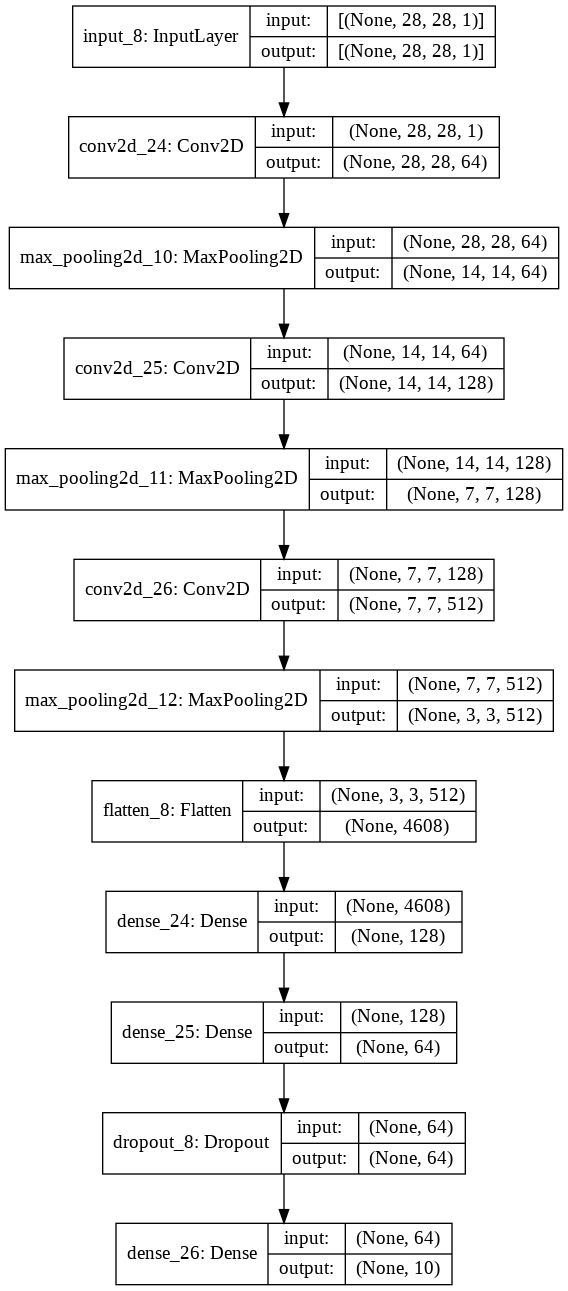

In [77]:
plot_model(model, show_shapes=True)

In [70]:
epochs = 100

model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(), metrics=['accuracy'])
hist = model.fit(train_generator, epochs = epochs, verbose = 1, validation_data = valid_generator)
print("The model has successfully trained")

Epoch 1/100
469/469 [==============================] - 31s 64ms/step - loss: 1.1943 - accuracy: 0.7357 - val_loss: 0.1387 - val_accuracy: 0.9809
Epoch 2/100
469/469 [==============================] - 30s 63ms/step - loss: 0.2022 - accuracy: 0.9638 - val_loss: 0.1233 - val_accuracy: 0.9842
Epoch 3/100
469/469 [==============================] - 29s 61ms/step - loss: 0.1553 - accuracy: 0.9741 - val_loss: 0.0950 - val_accuracy: 0.9892
Epoch 4/100
469/469 [==============================] - 28s 60ms/step - loss: 0.1315 - accuracy: 0.9782 - val_loss: 0.1013 - val_accuracy: 0.9852
Epoch 5/100
469/469 [==============================] - 29s 62ms/step - loss: 0.1231 - accuracy: 0.9797 - val_loss: 0.0937 - val_accuracy: 0.9856
Epoch 6/100
469/469 [==============================] - 28s 60ms/step - loss: 0.1140 - accuracy: 0.9807 - val_loss: 0.0770 - val_accuracy: 0.9904
Epoch 7/100
469/469 [==============================] - 30s 64ms/step - loss: 0.0919 - accuracy: 0.9863 - val_loss: 0.0688 - val_ac

In [71]:
#evaluate the model's accuracy
score = model.evaluate(valid_generator, verbose=0)
print('Test loss:', score[0])
print('\nTest accuracy:', score[1] * 100, '%')

Test loss: 0.02795935980975628

Test accuracy: 99.58000183105469 %


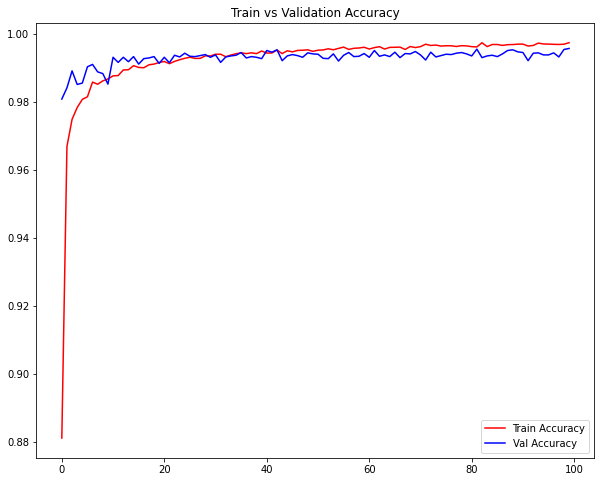

In [78]:
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']

epochs = len(train_acc)

val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

plt.figure(figsize = (10, 8))
plt.plot(range(epochs), train_acc, 'r', label = 'Train Accuracy')
plt.plot(range(epochs), val_acc, 'b', label = 'Val Accuracy')
# plt.ylim(0.98, 1.0)
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.show()

Text(0.5, 1.0, 'Train vs Validation Loss')

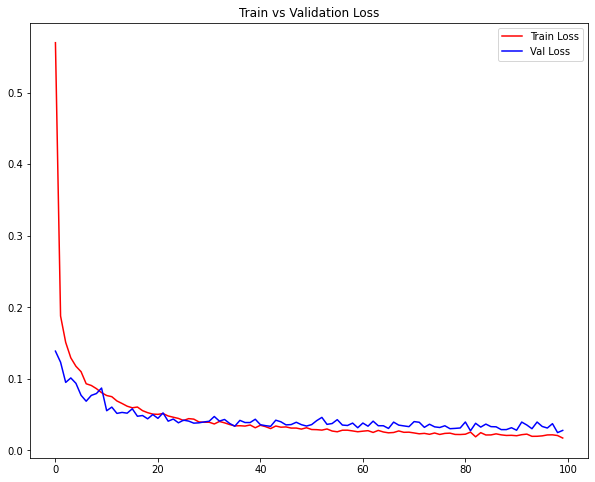

In [79]:
plt.figure(figsize = (10, 8))
plt.plot(range(epochs), train_loss, 'r', label = 'Train Loss')
plt.plot(range(epochs), val_loss, 'b', label = 'Val Loss')
plt.legend()
plt.title('Train vs Validation Loss')

In [74]:
# model.save('mnist.h5')
print("Saving the model as mnist.h5")


Saving the model as mnist.h5


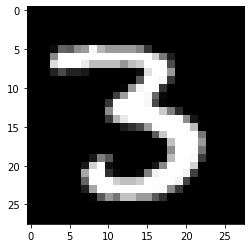

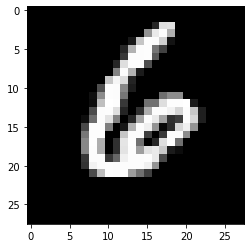

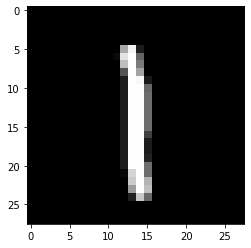

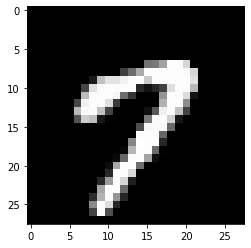

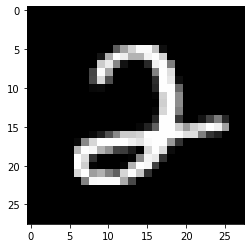

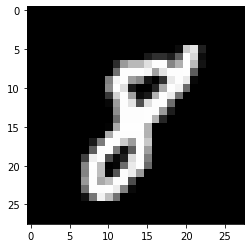

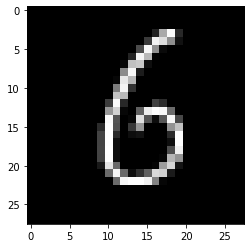

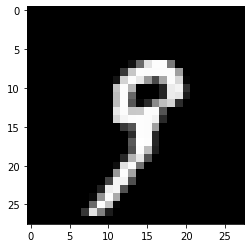

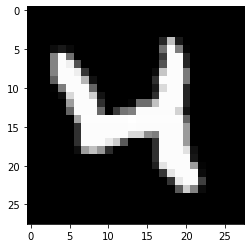

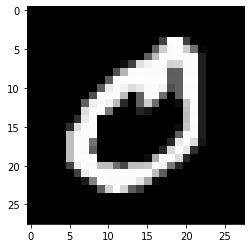

In [59]:
# training examples

for img in x_train[12:22]:
    img = img.numpy().reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.show()